# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome: Bernardo Dutra Lwemos
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [292]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [293]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [294]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [295]:
#Para acessar as labels
target = cancer.target
y = target

In [296]:
#Pegar as colunas que serão usadas na classificação
features = df.columns
X = df.values

# Número de folds da validação cruzada
SPLITS = 5
f1 = []

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

In [297]:
def test_model(model, X, y, cv=5):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores_macro = cross_val_score(model, x_train, y_train, cv=cv, scoring='f1_macro')
    scores_accuracy = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
    scores_recall = cross_val_score(model, x_train, y_train, cv=cv, scoring='recall')
    scores_precision = cross_val_score(model, x_train, y_train, cv=cv, scoring='precision')

    print("Acurácia: ", np.round(scores_accuracy.mean(),2))
    print("Precisão: ", np.round(scores_precision.mean(),2))
    print("Recall: ", np.round(scores_recall.mean(),2))
    print("F1: ", np.round(scores_macro.mean(),2))

    print("Acurácia no teste: ", np.round(accuracy_score(y_test, y_pred),2))
    ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred)).plot()
    #print("Matriz de confusão: \n", metrics.confusion_matrix(y_test, y_pred))
    return scores_macro.mean()


# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


Acurácia:  0.97
Precisão:  0.97
Recall:  0.98
F1:  0.96
Acurácia no teste:  0.96


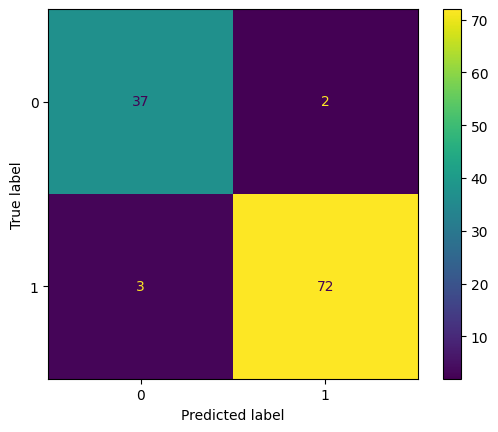

In [298]:
RandomForest = RandomForestClassifier(n_estimators=100,max_depth=20, random_state=23)
result = test_model(RandomForest, X, y, cv=SPLITS)
f1.append(result)

Acurácia:  0.95
Precisão:  0.96
Recall:  0.97
F1:  0.95
Acurácia no teste:  0.96


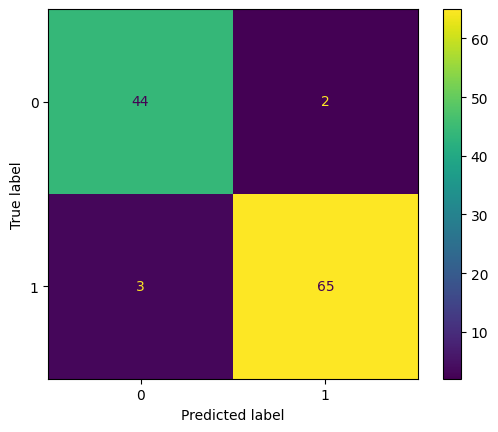

In [299]:
RandomForest = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=23)
result = test_model(RandomForest, X, y, cv=SPLITS)
f1.append(result)

Acurácia:  0.95
Precisão:  0.96
Recall:  0.96
F1:  0.94
Acurácia no teste:  0.98


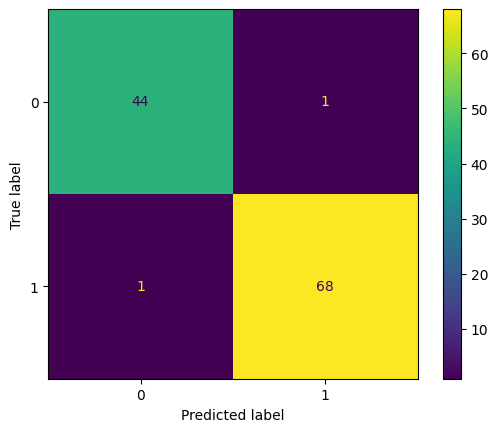

In [300]:
RandomForest = RandomForestClassifier(n_estimators=30,max_depth=15, random_state=23)
result = test_model(RandomForest, X, y, cv=SPLITS)
f1.append(result)

# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


Acurácia:  0.93
Precisão:  0.93
Recall:  0.96
F1:  0.92
Acurácia no teste:  0.95


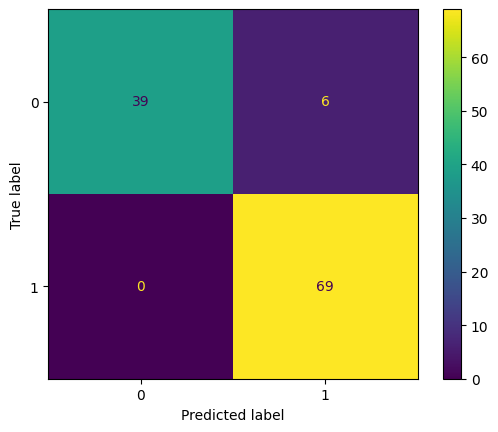

In [301]:
knn1 = KNeighborsClassifier(n_neighbors=10)
result = test_model(knn1, X, y, cv=5)
f1.append(result)

Acurácia:  0.91
Precisão:  0.9
Recall:  0.96
F1:  0.91
Acurácia no teste:  0.92


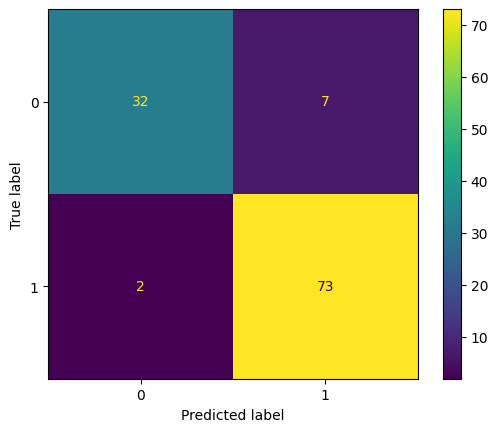

In [302]:
knn2 = KNeighborsClassifier(n_neighbors=50)
result = test_model(knn2, X, y, cv=5)
f1.append(result)

Acurácia:  0.92
Precisão:  0.9
Recall:  0.98
F1:  0.91
Acurácia no teste:  0.92


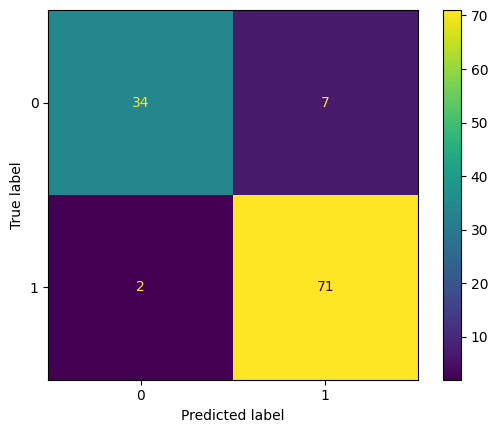

In [303]:
knn3 = KNeighborsClassifier(n_neighbors=25)
result = test_model(knn3, X, y, cv=5)
f1.append(result)

# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

Text(0.5, 1.0, 'Random Forest')

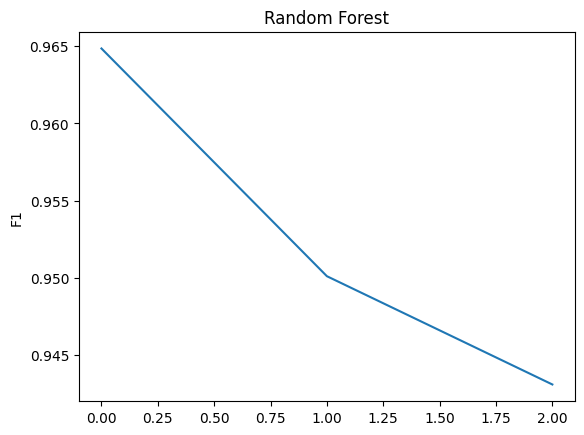

In [304]:
import matplotlib.pyplot as plt

plt.plot(f1[:3], label='Random Forest')
plt.ylabel('F1')
plt.title('Random Forest')


O melhor valor encontrado de F1 macro foi de 0.9648, com o modelo Random Forest com 100 estimadores e profundidade de 20.

Text(0, 0.5, 'F1')

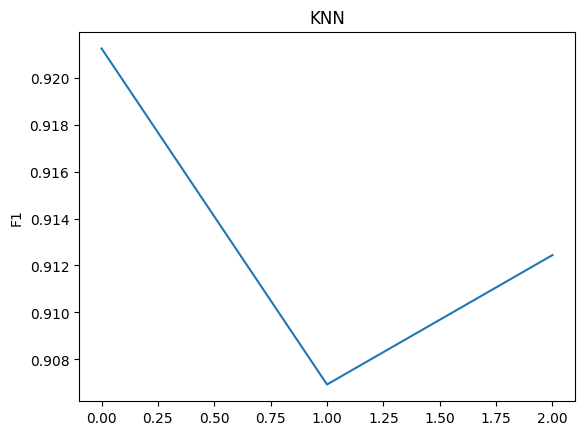

In [305]:
plt.plot(f1[3:], label='KNN')
plt.title('KNN')
plt.ylabel('F1')

O melhor método de KNN foi utilizando os 10 vizinhos mais próximos, o valor da macro F1 foi cerca de 2% mais alto em relação a 50 e 25 vizinhos.

# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [306]:
#Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

#Selecionando as 5 melhores features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
selector.fit(df, y)
X_new = selector.transform(df)
mask = selector.get_support()
new_features = df.columns[mask]
print("Features selecionadas: ")
for feature in new_features:
    print(feature)

Features selecionadas: 
('mean perimeter',)
('mean area',)
('area error',)
('worst perimeter',)
('worst area',)


Acurácia:  0.92
Precisão:  0.92
Recall:  0.96
F1:  0.92
Acurácia no teste:  0.97


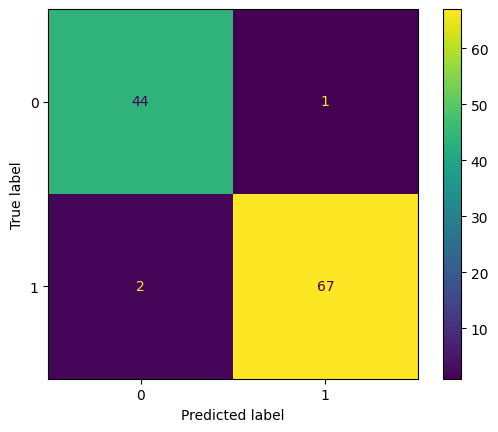

In [307]:
#Random Forest
RandomForest = RandomForestClassifier(n_estimators=30,max_depth=15, random_state=23)
result = test_model(RandomForest, X_new, y, cv=SPLITS)

Acurácia:  0.93
Precisão:  0.93
Recall:  0.96
F1:  0.92
Acurácia no teste:  0.96


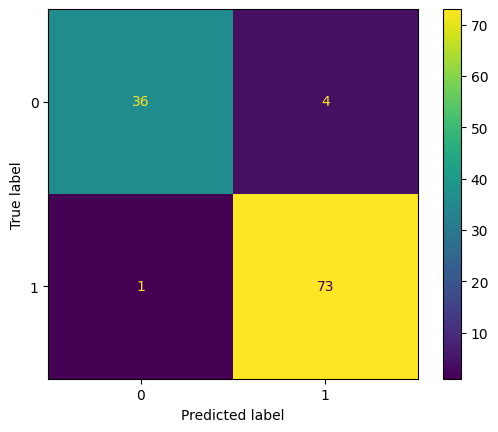

In [308]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10)
result = test_model(knn, X_new, y, cv=SPLITS)